In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
df = pd.read_csv('cat_breeds.csv', sep=";")

In [54]:
df = df[["Breed","Gender","Body_length","Weight","Fur_colour_dominant","Fur_pattern","Eye_colour"]]

In [55]:
df

,Breed,Gender,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour
0,Angora,female,19,2.0,white,solid,blue
1,Angora,male,19,2.5,white,solid,blue
2,Angora,male,20,2.8,black,solid,green
3,Angora,female,21,3.0,white,solid,blue
4,Angora,male,21,3.0,red/cream,tabby,green
...,...,...,...,...,...,...,...
1066,Maine coon,female,15,1.2,white,solid,blue
1067,Maine coon,female,17,1.0,black,bicolor,blue
1068,Maine coon,male,14,0.7,red/cream,tabby,blue
1069,Maine coon,male,16,1.1,red/cream,tabby,green


<Axes: xlabel='Breed', ylabel='count'>

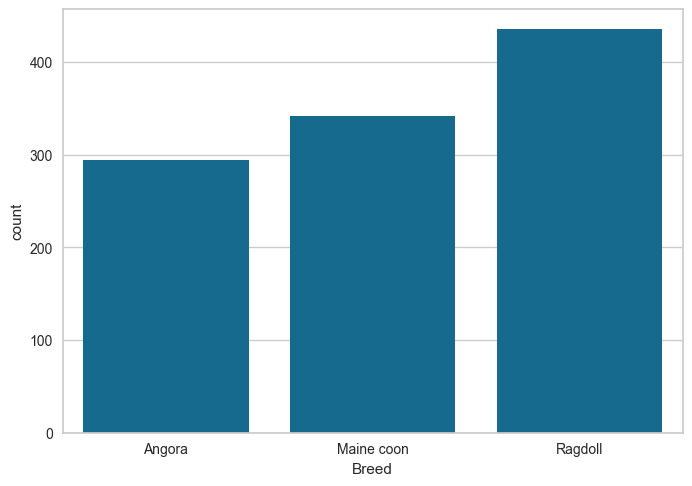

In [56]:
sns.countplot(x = df['Breed'])

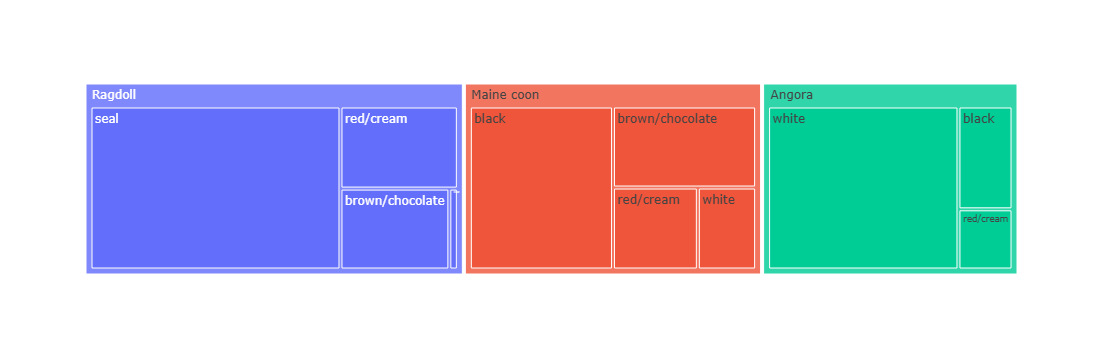

In [57]:
grafico = px.treemap(df, path=['Breed','Fur_colour_dominant'])
grafico.show()

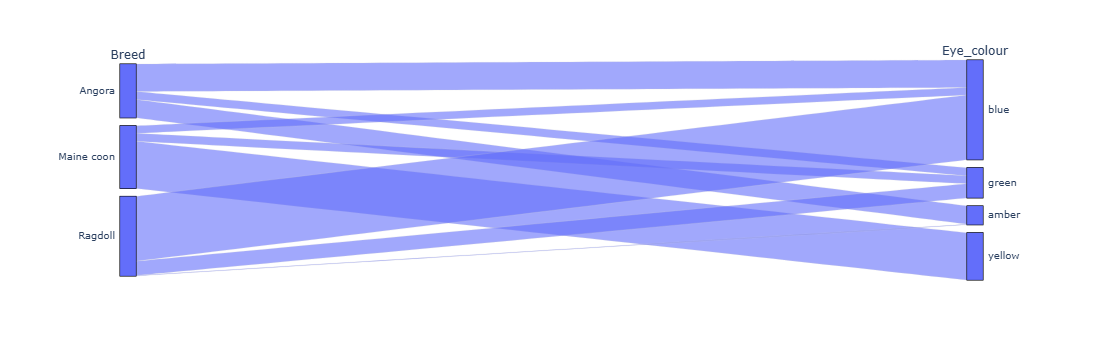

In [58]:
grafico = px.parallel_categories(df, dimensions=['Breed', 'Eye_colour'])
grafico.show()

In [136]:
x = df.iloc[:,1:7].values
y = df.iloc[:, 0].values

In [138]:
x[0]

array(['female', 19, 2.0, 'white', 'solid', 'blue'], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder

gender = LabelEncoder()
color = LabelEncoder()
fur_pattern = LabelEncoder()
eye_color = LabelEncoder()

In [63]:
x[:,0] = gender.fit_transform(x[:,0])
x[:,3] = color.fit_transform(x[:,3])
x[:,4] = fur_pattern.fit_transform(x[:,4])
x[:,5] = eye_color.fit_transform(x[:,5])

In [64]:
x[0]

array([0, 19, 2.0, 5, 3, 1], dtype=object)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

x_train.shape, x_test.shape

((856, 6), (215, 6))

In [45]:
import pickle
with open('breed.pkl', mode = 'wb')as f:
        pickle.dump([x_train, y_train, x_test, y_test], f )

### Usando Naive

In [46]:
from sklearn.naive_bayes import GaussianNB
with open('breed.pkl','rb')as f:
        x_train, y_train, x_test, y_test = pickle.load(f)

naive = GaussianNB()
naive.fit(x_train, y_train)
previsoes = naive.predict(x_test)
previsoes

array(['Ragdoll', 'Ragdoll', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Ragdoll', 'Ragdoll', 'Maine coon', 'Maine coon', 'Ragdoll',
       'Ragdoll', 'Angora', 'Ragdoll', 'Angora', 'Angora', 'Ragdoll',
       'Angora', 'Maine coon', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Maine coon', 'Maine coon', 'Maine coon', 'Ragdoll', 'Ragdoll',
       'Ragdoll', 'Angora', 'Angora', 'Ragdoll', 'Maine coon', 'Ragdoll',
       'Ragdoll', 'Maine coon', 'Maine coon', 'Ragdoll', 'Ragdoll',
       'Maine coon', 'Ragdoll', 'Ragdoll', 'Maine coon', 'Angora',
       'Angora', 'Maine coon', 'Angora', 'Maine coon', 'Ragdoll',
       'Maine coon', 'Ragdoll', 'Angora', 'Angora', 'Maine coon',
       'Angora', 'Ragdoll', 'Angora', 'Angora', 'Maine coon',
       'Maine coon', 'Angora', 'Maine coon', 'Ragdoll', 'Angora',
       'Maine coon', 'Angora', 'Ragdoll', 'Angora', 'Ragdoll', 'Ragdoll',
       'Angora', 'Ragdoll', 'Ragdoll', 'Angora', 'Ragdoll', 'Ragdoll',
       'Ragdoll', 'Ragdoll', 'Maine coo

In [48]:
y_test

array(['Ragdoll', 'Angora', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Ragdoll', 'Ragdoll', 'Maine coon', 'Maine coon', 'Ragdoll',
       'Ragdoll', 'Angora', 'Ragdoll', 'Angora', 'Maine coon', 'Ragdoll',
       'Angora', 'Maine coon', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Maine coon', 'Maine coon', 'Maine coon', 'Ragdoll', 'Ragdoll',
       'Maine coon', 'Angora', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Angora', 'Ragdoll', 'Maine coon', 'Maine coon', 'Ragdoll',
       'Ragdoll', 'Maine coon', 'Ragdoll', 'Ragdoll', 'Maine coon',
       'Angora', 'Angora', 'Maine coon', 'Maine coon', 'Maine coon',
       'Angora', 'Maine coon', 'Ragdoll', 'Angora', 'Angora',
       'Maine coon', 'Maine coon', 'Ragdoll', 'Angora', 'Angora',
       'Maine coon', 'Maine coon', 'Angora', 'Maine coon', 'Ragdoll',
       'Angora', 'Maine coon', 'Angora', 'Ragdoll', 'Angora', 'Ragdoll',
       'Ragdoll', 'Angora', 'Ragdoll', 'Maine coon', 'Angora', 'Ragdoll',
       'Ragdoll', 'Maine coon',

0.8883720930232558

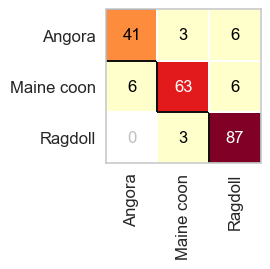

In [50]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(naive)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [68]:
from sklearn.metrics import precision_score

pred = naive.predict(x_test)
precision = precision_score(y_test, pred, average='macro')
precision

0.8880572608602212

### Usando Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [127]:
tree = DecisionTreeClassifier(criterion='gini',splitter='best', random_state=0, min_samples_split=5, max_depth=10)
tree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [128]:
previsoes = tree.predict(x_test)
previsoes

array(['Ragdoll', 'Angora', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Ragdoll', 'Ragdoll', 'Angora', 'Maine coon', 'Ragdoll', 'Ragdoll',
       'Angora', 'Ragdoll', 'Angora', 'Maine coon', 'Ragdoll', 'Angora',
       'Maine coon', 'Maine coon', 'Ragdoll', 'Maine coon', 'Maine coon',
       'Maine coon', 'Maine coon', 'Ragdoll', 'Ragdoll', 'Angora',
       'Angora', 'Angora', 'Ragdoll', 'Maine coon', 'Angora', 'Ragdoll',
       'Maine coon', 'Maine coon', 'Ragdoll', 'Ragdoll', 'Maine coon',
       'Ragdoll', 'Ragdoll', 'Maine coon', 'Angora', 'Angora',
       'Maine coon', 'Angora', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Ragdoll', 'Angora', 'Angora', 'Maine coon', 'Angora', 'Ragdoll',
       'Angora', 'Angora', 'Maine coon', 'Maine coon', 'Angora',
       'Maine coon', 'Ragdoll', 'Angora', 'Maine coon', 'Angora',
       'Ragdoll', 'Angora', 'Ragdoll', 'Ragdoll', 'Angora', 'Ragdoll',
       'Maine coon', 'Angora', 'Ragdoll', 'Ragdoll', 'Angora', 'Ragdoll',
       'Maine coon

In [129]:
pred = tree.predict(x_test)
precision = precision_score(y_test, pred, average='macro')
precision

0.944612858405962

0.9534883720930233

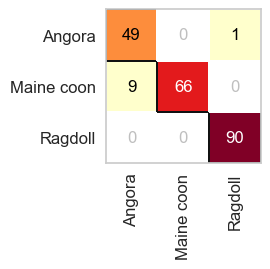

In [131]:
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(tree)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

### Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [133]:
previsoes = forest.predict(x_test)
previsoes

array(['Ragdoll', 'Angora', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Ragdoll', 'Ragdoll', 'Maine coon', 'Maine coon', 'Ragdoll',
       'Ragdoll', 'Angora', 'Ragdoll', 'Angora', 'Maine coon', 'Ragdoll',
       'Angora', 'Maine coon', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Maine coon', 'Maine coon', 'Maine coon', 'Ragdoll', 'Ragdoll',
       'Maine coon', 'Angora', 'Maine coon', 'Ragdoll', 'Maine coon',
       'Angora', 'Ragdoll', 'Maine coon', 'Maine coon', 'Ragdoll',
       'Ragdoll', 'Maine coon', 'Ragdoll', 'Ragdoll', 'Maine coon',
       'Angora', 'Angora', 'Maine coon', 'Maine coon', 'Maine coon',
       'Ragdoll', 'Maine coon', 'Ragdoll', 'Angora', 'Angora',
       'Maine coon', 'Angora', 'Ragdoll', 'Maine coon', 'Angora',
       'Maine coon', 'Maine coon', 'Angora', 'Maine coon', 'Ragdoll',
       'Angora', 'Maine coon', 'Angora', 'Ragdoll', 'Angora', 'Ragdoll',
       'Ragdoll', 'Angora', 'Ragdoll', 'Maine coon', 'Angora', 'Ragdoll',
       'Ragdoll', 'Angora', 'R

In [134]:
pred = forest.predict(x_test)
precision = precision_score(y_test, pred, average='macro')
precision

0.9457216597180862

0.9534883720930233

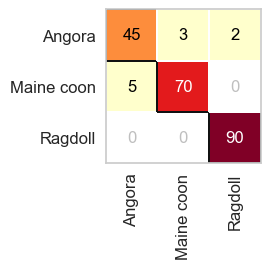

In [135]:
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(forest)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)